In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense, Dropout
import math
import statsmodels.api as sm
from sklearn.neural_network import MLPClassifier

Using TensorFlow backend.


In [3]:
data = pd.read_csv('daily-minimum-temperatures-in-me.csv')
data.head(10)

,Date,Temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


In [4]:
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 3650 | Colunas: 2'

In [5]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], date_parser=dateparse)

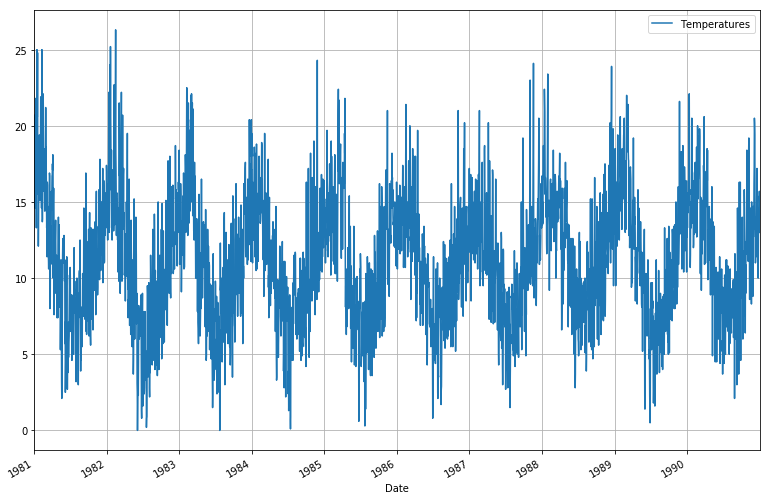

In [6]:
fig = figsize=(13, 9)

data.plot(x='Date', y='Temperatures', figsize=fig)
plt.grid(True)
plt.show()

In [7]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if (end_ix > len(sequence)-1): break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [8]:
n_steps = 5

In [9]:
X, y = split_sequence(sequence=data['Temperatures'], n_steps=n_steps)

In [10]:
print(len(X))
print(X[0])
print(y[0])

3645
[20.7 17.9 18.8 14.6 15.8]
15.8


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#X_train = X[:math.floor(len(X)*0.3)]
#X_test = X[math.floor(len(X)*0.3):]
#y_train = y[:math.floor(len(X)*0.3)]
#y_test = y[math.floor(len(X)*0.3):]

In [12]:
mlp = Sequential()

mlp.add(
    Dense(
        units=2,
        activation='relu',
        kernel_initializer='random_normal',
        input_dim=n_steps
    )
)

mlp.add(Dropout(0.25))

mlp.add(
    Dense(
        units=3,
        activation='relu',
        kernel_initializer='random_normal'
    )
)

mlp.add(Dropout(0.25))

mlp.add(
    Dense(
        units=1,
        activation='sigmoid',
        kernel_initializer='random_normal'
    )
)

In [13]:
mlp.compile(optimizer='adam',
            loss=losses.mean_absolute_percentage_error,
            metrics=['accuracy']
            )

In [14]:
model = mlp.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 2551 samples, validate on 1094 samples
Epoch 1/50
2551/2551 [==============================] - 0s 133us/step - loss: 395040.4154 - acc: 0.0000e+00 - val_loss: 94.5689 - val_acc: 0.0000e+00
Epoch 2/50
2551/2551 [==============================] - 0s 55us/step - loss: 393036.1430 - acc: 0.0000e+00 - val_loss: 94.5983 - val_acc: 0.0000e+00
Epoch 3/50
2551/2551 [==============================] - 0s 48us/step - loss: 390559.5922 - acc: 7.8401e-04 - val_loss: 94.6271 - val_acc: 0.0000e+00
Epoch 4/50
2551/2551 [==============================] - 0s 45us/step - loss: 388234.0718 - acc: 7.8401e-04 - val_loss: 94.6544 - val_acc: 0.0000e+00
Epoch 5/50
2551/2551 [==============================] - 0s 49us/step - loss: 385668.0962 - acc: 7.8401e-04 - val_loss: 94.6846 - val_acc: 0.0000e+00
Epoch 6/50
2551/2551 [==============================] - 0s 43us/step - loss: 383535.5330 - acc: 7.8401e-04 - val_loss: 94.7241 - val_acc: 0.0000e+00
Epoch 7/50
2551/2551 [==============================] - 0

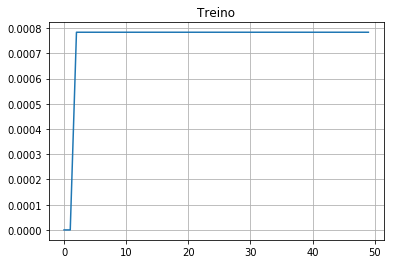

In [15]:
plt.title('Treino')
plt.grid(True)
plt.plot(model.history['acc'])
plt.show()

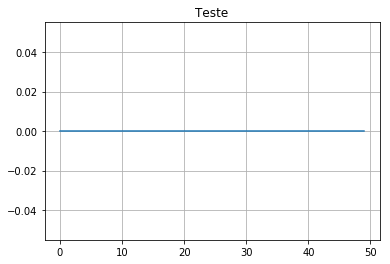

In [16]:
plt.title('Teste')
plt.grid(True)
plt.plot(model.history['val_acc'])
plt.show()

In [17]:
model = mlp.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 2551 samples, validate on 1094 samples
Epoch 1/100
2551/2551 [==============================] - 0s 52us/step - loss: 278657.3260 - acc: 7.8401e-04 - val_loss: 96.0656 - val_acc: 0.0000e+00
Epoch 2/100
2551/2551 [==============================] - 0s 54us/step - loss: 276587.2212 - acc: 7.8401e-04 - val_loss: 96.0962 - val_acc: 0.0000e+00
Epoch 3/100
2551/2551 [==============================] - 0s 44us/step - loss: 274310.7555 - acc: 7.8401e-04 - val_loss: 96.1186 - val_acc: 0.0000e+00
Epoch 4/100
2551/2551 [==============================] - 0s 49us/step - loss: 272470.0938 - acc: 7.8401e-04 - val_loss: 96.1499 - val_acc: 0.0000e+00
Epoch 5/100
2551/2551 [==============================] - 0s 46us/step - loss: 270050.7342 - acc: 7.8401e-04 - val_loss: 96.1782 - val_acc: 0.0000e+00
Epoch 6/100
2551/2551 [==============================] - 0s 53us/step - loss: 268288.5170 - acc: 7.8401e-04 - val_loss: 96.2059 - val_acc: 0.0000e+00
Epoch 7/100
2551/2551 [=============================

Epoch 55/100
2551/2551 [==============================] - 0s 43us/step - loss: 176957.6602 - acc: 7.8401e-04 - val_loss: 97.4197 - val_acc: 0.0000e+00
Epoch 56/100
2551/2551 [==============================] - 0s 44us/step - loss: 175312.6649 - acc: 7.8401e-04 - val_loss: 97.4371 - val_acc: 0.0000e+00
Epoch 57/100
2551/2551 [==============================] - 0s 43us/step - loss: 173790.5038 - acc: 7.8401e-04 - val_loss: 97.4589 - val_acc: 0.0000e+00
Epoch 58/100
2551/2551 [==============================] - 0s 41us/step - loss: 172222.8727 - acc: 7.8401e-04 - val_loss: 97.4814 - val_acc: 0.0000e+00
Epoch 59/100
2551/2551 [==============================] - 0s 43us/step - loss: 170656.6093 - acc: 7.8401e-04 - val_loss: 97.5016 - val_acc: 0.0000e+00
Epoch 60/100
2551/2551 [==============================] - 0s 42us/step - loss: 169153.1629 - acc: 7.8401e-04 - val_loss: 97.5229 - val_acc: 0.0000e+00
Epoch 61/100
2551/2551 [==============================] - 0s 43us/step - loss: 167702.3602 - a

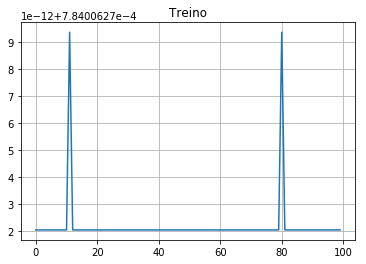

In [18]:
plt.title('Treino')
plt.grid(True)
plt.plot(model.history['acc'])
plt.show()

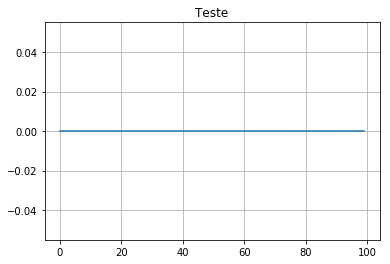

In [19]:
plt.title('Teste')
plt.grid(True)
plt.plot(model.history['val_acc'])
plt.show()

In [20]:
mlp_skl = MLPClassifier(
    hidden_layer_sizes=(2,3,1),
    max_iter=50,
    activation='relu',
    solver='adam'
)

In [21]:
mlp_skl.fit(X_train, y_train)

ValueError: Unknown label type: (array([ 8.7, 13.7, 16.1, ...,  4.8, 18.4,  6. ]),)